In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
net = cv2.dnn.readNet("/home/robson/Documents/YOLO_WORKSHOP/yolov3.weights", "/home/robson/Documents/YOLO_WORKSHOP/darknet/cfg/yolov3.cfg")
classes = []

with open("/home/robson/Documents/YOLO_WORKSHOP/darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()

output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [19]:
img = cv2.imread("/home/robson/Documents/YOLO_WORKSHOP/darknet/data/person.jpg")

img = cv2.resize(img, None, fx=0.4, fy=0.4)

height, width, channels = img.shape

In [20]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)
net.setInput(blob)

In [21]:
outs = net.forward(output_layers)

In [22]:
class_ids = []
confidences = []
boxes = []

In [23]:
for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]

      if confidence > 0.5:
          center_x = int(detection[0] * width)
          center_y = int(detection[1] * height)
          w = int(detection[2] * width)
          h = int(detection[3] * height)

          x = int(center_x - w / 2)
          y = int(center_y - h / 2)

          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          class_ids.append(class_id)

          color = colors[0]

          cv2.rectangle(img, (x,y), (x + w, y + h), color, 2)

          cv2.circle(img, (center_x, center_y), 10, (0, 255, 0), 2)

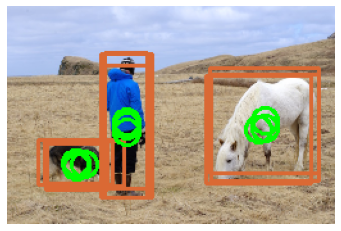

In [24]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
persons = 0
font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
  if i in indexes :
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    color = colors[i]
    cv2.rectangle(img, (x,y), (x + w, y + h), color, 2)
    cv2.putText(img, label + " " + str(round(confidence, 2)), (x, y +30), font, 3, color, 3)


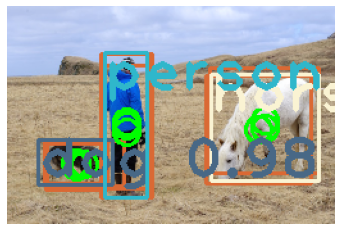

In [26]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
persons

0